MLT-Theory-CSE6024_Digital-Assignment-1: Logistic Regression and Naive Bayes Classifier 

Implementataion for demonstration of Binary Classification on  the  customised  "applicants_acrec"  dataset 

Submitted By: 20MAI0001 - NIHARIKA MAITRA

Git Repo link :   



https://github.com/Niharika-20-MAI-01/Winter-2021-MLTechniques-LabCSE6024-Niharika-20MAI01/blob/main/MLT-Theory-CSE6024_Digital-Assignment-1__20MAI0001_NIHARIKA%20MAITRA_Binary_Classification_Implementationon_the_customised_dataset---applicants_acrec.ipynb


# A brief Introduction on the dataset  "applicants_acrec"  used in this Project:

1) The customised dataset "applicants_acrec" is used in this Project for demonstrating the implementation of Logistic Regression and Naive Bayes Classifier models for Binary Classification. 


2)This dataset is basically a record of the different types of information corresponding / relating to the entire Academic Carrer of a candidate / applicant, applying for a particular Job Role / Post in an MNC of the IT Industry.


3)The different possible values for each of these informations corresponding to the  Academic Carrer of a candidate / applicant, serves as the determining Parameters / Criteria, for a candidate / applicant to get Shortlisted by the MNC for further rounds of selection / Interview. 


4) These informations corresponding to the Academic Carrer of a candidate / applicant, applying for a particular Job Role / Post in the MNC, serves as the Features / Predictors (a total of 19 present in the dataset)---> ["Age", "Gender", "SSC_Marks", "HSC_Marks", "Type_of_Bachelors_degree", "Branch_of_Bachelors_Degree","GPA_of_Bachelors_degree","Duration of Bachelors Degree", "No_of_year_gaps", "Year_of_Graduation", "Work_Exp", "Projects_done", "Expertise on Domain Knowledge", "No_of _standing_Arrears", "Record_of_prev_Arrears", "Dedication_to_learn_and_adapt_to_new_oppertunities", "Social_skills", "Extra_curricular_achievements", "Comfortable to Relocate"] for a Binary Classifier Model implementing Binary Classification.


5)These Input Features / Parameters of the dataset are cumulatively used to Predict / Determine the Outcome of the event of a candidate / applicant getting Shortlisted or Rejected, by the MNC, for further rounds of selection / Interview, realised through the Response / Binary Classification Class Variable ---> "Shortlisted".


6) Thus, in this project Binary Classification is demonstrated by implementing two types of Binary Classifier Models (Naive Bayes Classifier Model and Logistic Regression Model ) to determine the total count of the candidates / applicants that are Shortlisted and the count of the candidates / applicants that are Rejected by the MNC, for further rounds of selection / Interview, based on the data / record of the input dataset "applicants_acrec" .


In [237]:
# To Import the required Libraries and Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [238]:
# To Read the dataset onto a variable (DataFrame) using Pandas
dataset1 = pd.read_csv("applicants_acrec.csv") #applicants_acrec.csv

#Display the first 10 records
dataset1.head(10)


,Age,Gender,SSC_Marks,HSC_Marks,Type_of_Bachelors_degree,Branch_of_Bachelors_Degree,GPA_of_Bachelors_degree,Duration of Bachelors Degree,No_of_year_gaps,Year_of_Graduation,Work_Exp,Projects_done,Expertise on Domain Knowledge,No_of _standing_Arrears,Record_of_prev_Arrears,Dedication_to_learn_and_adapt_to_new_oppertunities,Social_skills,Extra_curricular_achievements,Comfortable to Relocate,Shortlisted
0,23,Female,96.58,93.33,BTECH,Computer Science,8.98,4,1,2019,No,Yes,Advanced,0,No,Moderate,Low,No,Yes,Yes
1,29,Male,87.30,90.67,BE,Electronics,7.66,4,2,2018,Yes,Yes,Advanced,0,Yes,Moderate,High,Yes,Yes,No
2,28,Male,76.78,75.32,BTECH,Information Technology,8.10,4,0,2020,No,No,Begineer,0,No,Low,Moderate,No,No,No
3,22,Female,90.56,83.23,BCA,Computer Appliations,7.89,3,2,2018,No,Yes,Mediocre,1,No,Moderate,Low,Yes,Yes,Yes
4,25,Male,70.40,69.78,BTECH,Electronics,8.35,5,1,2019,Yes,No,Begineer,0,No,High,Moderate,Yes,No,Yes
5,30,Female,83.41,75.34,BCA,Computer Appliations,8.53,3,0,2020,No,Yes,Mediocre,1,Yes,High,Low,No,Yes,Yes
6,23,Female,93.45,95.89,BE,Information Technology,9.15,4,0,2020,No,No,Begineer,0,Yes,Moderate,High,Yes,No,Yes
7,26,Male,78.90,67.86,BTECH,Electronics,7.65,4,1,2019,No,Yes,Mediocre,1,No,High,Moderate,No,Yes,Yes
8,24,Female,89.34,93.24,BE,Information Technology,9.35,5,0,2020,No,No,Begineer,0,No,Moderate,High,No,Yes,No
9,30,Male,75.85,67.98,BCA,Computer Appliations,8.54,3,0,2020,No,Yes,Mediocre,0,Yes,Low,Moderate,Yes,Yes,Yes


In [239]:
# All attributes/Features selected from the Input dataset to be stored in a dataframe inorder to 
#perform Binary Classification based on the characteristics of those attibutes/features

df = dataset1[["Age", "Gender", "SSC_Marks", "HSC_Marks", "Type_of_Bachelors_degree", "Branch_of_Bachelors_Degree","GPA_of_Bachelors_degree","Duration of Bachelors Degree", "No_of_year_gaps", "Year_of_Graduation", "Work_Exp", "Projects_done", "Expertise on Domain Knowledge", "No_of _standing_Arrears", "Record_of_prev_Arrears", "Dedication_to_learn_and_adapt_to_new_oppertunities", "Social_skills", "Extra_curricular_achievements", "Comfortable to Relocate","Shortlisted"]] 
df

,Age,Gender,SSC_Marks,HSC_Marks,Type_of_Bachelors_degree,Branch_of_Bachelors_Degree,GPA_of_Bachelors_degree,Duration of Bachelors Degree,No_of_year_gaps,Year_of_Graduation,Work_Exp,Projects_done,Expertise on Domain Knowledge,No_of _standing_Arrears,Record_of_prev_Arrears,Dedication_to_learn_and_adapt_to_new_oppertunities,Social_skills,Extra_curricular_achievements,Comfortable to Relocate,Shortlisted
0,23,Female,96.58,93.33,BTECH,Computer Science,8.98,4,1,2019,No,Yes,Advanced,0,No,Moderate,Low,No,Yes,Yes
1,29,Male,87.30,90.67,BE,Electronics,7.66,4,2,2018,Yes,Yes,Advanced,0,Yes,Moderate,High,Yes,Yes,No
2,28,Male,76.78,75.32,BTECH,Information Technology,8.10,4,0,2020,No,No,Begineer,0,No,Low,Moderate,No,No,No
3,22,Female,90.56,83.23,BCA,Computer Appliations,7.89,3,2,2018,No,Yes,Mediocre,1,No,Moderate,Low,Yes,Yes,Yes
4,25,Male,70.40,69.78,BTECH,Electronics,8.35,5,1,2019,Yes,No,Begineer,0,No,High,Moderate,Yes,No,Yes
5,30,Female,83.41,75.34,BCA,Computer Appliations,8.53,3,0,2020,No,Yes,Mediocre,1,Yes,High,Low,No,Yes,Yes
6,23,Female,93.45,95.89,BE,Information Technology,9.15,4,0,2020,No,No,Begineer,0,Yes,Moderate,High,Yes,No,Yes
7,26,Male,78.90,67.86,BTECH,Electronics,7.65,4,1,2019,No,Yes,Mediocre,1,No,High,Moderate,No,Yes,Yes
8,24,Female,89.34,93.24,BE,Information Technology,9.35,5,0,2020,No,No,Begineer,0,No,Moderate,High,No,Yes,No
9,30,Male,75.85,67.98,BCA,Computer Appliations,8.54,3,0,2020,No,Yes,Mediocre,0,Yes,Low,Moderate,Yes,Yes,Yes


Implementing some Feature Engineering on the Input Dataset as follows:

In [240]:
# To view detailed information of the different Data Types of the variables present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 20 non-null     int64  
 1   Gender                                              20 non-null     object 
 2   SSC_Marks                                           20 non-null     float64
 3   HSC_Marks                                           20 non-null     float64
 4   Type_of_Bachelors_degree                            20 non-null     object 
 5   Branch_of_Bachelors_Degree                          20 non-null     object 
 6   GPA_of_Bachelors_degree                             20 non-null     float64
 7   Duration of Bachelors Degree                        20 non-null     int64  
 8   No_of_year_gaps                                     20 non-null     int64  
 9   Y

In [241]:
#To display the number of occurrences of each distinct value of the Feature Variable 'Gender' in the dataset
df['Gender'].value_counts()

Female    11
Male       9
Name: Gender, dtype: int64

In [242]:
# Change male to 1 and female to 0 - Implementing Encoding

#Using the Single Line / Inline Function Lambda Function 
#We need to name the function and call it with a one line Logic

df["Gender"] = df["Gender"].apply(lambda gen:0 if gen=="Female" else 1)
df["Gender"]


0     0
1     1
2     1
3     0
4     1
5     0
6     0
7     1
8     0
9     1
10    0
11    0
12    1
13    0
14    1
15    0
16    0
17    1
18    1
19    0
Name: Gender, dtype: int64

In [243]:
#To display all the unique values present for the Feature Variable 'Age' in the dataset
df['Age'].unique()

array([23, 29, 28, 22, 25, 30, 26, 24], dtype=int64)

In [244]:
#To display all the unique values present for the Feature Variable 'Type_of_Bachelors_degree' in the dataset
df['Type_of_Bachelors_degree'].unique()

array(['BTECH', 'BE', 'BCA'], dtype=object)

In [245]:
#To display all the unique values present for the Feature Variable 'Branch_of_Bachelors_Degree' in the dataset
df['Branch_of_Bachelors_Degree'].unique()    

array(['Computer Science', 'Electronics', 'Information Technology',
       'Computer Appliations'], dtype=object)

In [246]:
#To display the number of occurrences of each of the distinct values of the Feature Variable 'Year_of_Graduation' in the dataset
df['Year_of_Graduation'].value_counts()

2020    10
2019     6
2018     4
Name: Year_of_Graduation, dtype: int64

In [247]:
#To display the number of occurrences of each of the distinct values of the Response / Binary Classification Class Variable 'Shortlisted' in the dataset
df['Shortlisted'].value_counts()

Yes    13
No      7
Name: Shortlisted, dtype: int64

In [248]:
# To check and give the count of missing values present for each of the attributes ("Age", "Gender", "SSC_Marks", "HSC_Marks", "Type_of_Bachelors_degree", "Branch_of_Bachelors_Degree","GPA_of_Bachelors_degree","Duration of Bachelors Degree", "No_of_year_gaps", "Year_of_Graduation", "Work_Exp", "Projects_done", "Expertise on Domain Knowledge", "No_of _standing_Arrears", "Record_of_prev_Arrears", "Dedication_to_learn_and_adapt_to_new_oppertunities", "Social_skills", "Extra_curricular_achievements", "Comfortable to Relocate","Shortlisted") of the dataset
df.isna().sum()

Age                                                   0
Gender                                                0
SSC_Marks                                             0
HSC_Marks                                             0
Type_of_Bachelors_degree                              0
Branch_of_Bachelors_Degree                            0
GPA_of_Bachelors_degree                               0
Duration of Bachelors Degree                          0
No_of_year_gaps                                       0
Year_of_Graduation                                    0
Work_Exp                                              0
Projects_done                                         0
Expertise on Domain Knowledge                         0
No_of _standing_Arrears                               0
Record_of_prev_Arrears                                0
Dedication_to_learn_and_adapt_to_new_oppertunities    0
Social_skills                                         0
Extra_curricular_achievements                   

Plotting some of the Feature Variables / Predictors against that of the Response / Binary Classification Class Variable to analyse the relationship between each of the Feature Variables / Predictors with that of the Response / Binary Classification Class Variable of the input dataset

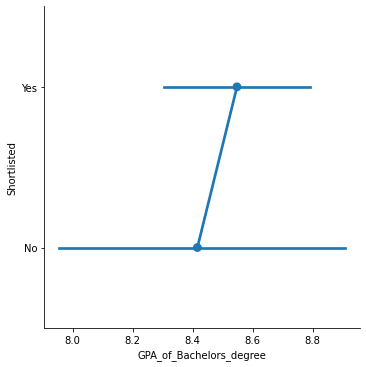

In [249]:
#Plotting Factor Plot betweeen 'GPA_of_Bachelors_degree' and 'Shortlisted'
sns.factorplot(x = 'GPA_of_Bachelors_degree', y = 'Shortlisted', data = df)

                         Shortlisted
GPA_of_Bachelors_degree             
7.59                               0
9.35                               0
8.21                               0
8.10                               0
8.55                               0
7.66                               0
9.45                               0
8.35                               1
8.53                               1
8.54                               1
7.65                               1
8.59                               1
8.69                               1
8.85                               1
8.96                               1
8.98                               1
9.05                               1
9.15                               1
7.89                               1


(array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

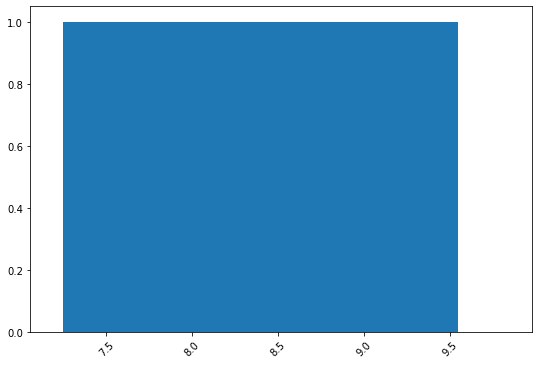

In [273]:
#Plotting  Bar graph betweeen 'GPA_of_Bachelors_degree' and 'Shortlisted'

groupedby_places = df.groupby('GPA_of_Bachelors_degree')[['Shortlisted']].mean()
print(groupedby_places.sort_values(by = ['Shortlisted']))
plt.figure(figsize=(9,6))
plt.bar(x=df['GPA_of_Bachelors_degree'],height=df['Shortlisted'])
plt.xticks(rotation=45)

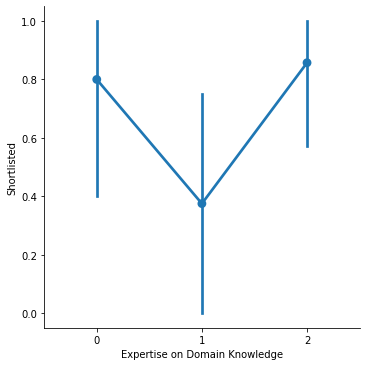

In [278]:
#Plotting Factor Plot betweeen 'Expertise on Domain Knowledge' and 'Shortlisted'
sns.factorplot(x = 'Expertise on Domain Knowledge', y = 'Shortlisted', data = df)

                               Shortlisted
Expertise on Domain Knowledge             
1                                 0.375000
0                                 0.800000
2                                 0.857143


(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

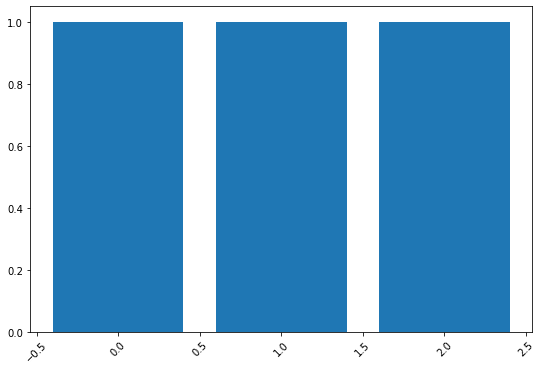

In [279]:
#Plotting  Bar graph betweeen 'Expertise on Domain Knowledge' and 'Shortlisted'

groupedby_places = df.groupby('Expertise on Domain Knowledge')[['Shortlisted']].mean()
print(groupedby_places.sort_values(by = ['Shortlisted']))
plt.figure(figsize=(9,6))
plt.bar(x=df['Expertise on Domain Knowledge'],height=df['Shortlisted'])
plt.xticks(rotation=45)

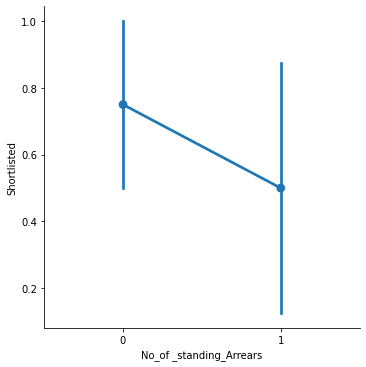

In [281]:
#Plotting Factor Plot betweeen 'No_of _standing_Arrears' and 'Shortlisted'

sns.factorplot(x = 'No_of _standing_Arrears', y = 'Shortlisted', data = df)

                         Shortlisted
No_of _standing_Arrears             
1                               0.50
0                               0.75


(array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

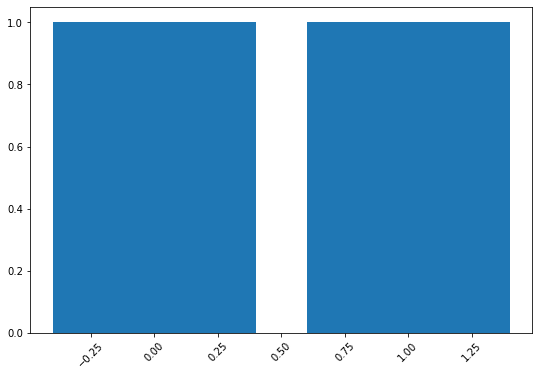

In [282]:
#Plotting  Bar graph betweeen 'No_of _standing_Arrears' and 'Shortlisted'

groupedby_places = df.groupby('No_of _standing_Arrears')[['Shortlisted']].mean()
print(groupedby_places.sort_values(by = ['Shortlisted']))
plt.figure(figsize=(9,6))
plt.bar(x=df['No_of _standing_Arrears'],height=df['Shortlisted'])
plt.xticks(rotation=45)

Converting the data type of "Type_of_Bachelors_degree" from string to float using LabelEncoder() :

In [283]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for Type_of_Bachelors_degree in df.columns:
        if df[Type_of_Bachelors_degree].dtype == object:
            df[Type_of_Bachelors_degree] = le.fit_transform(df[Type_of_Bachelors_degree])
        else:
            pass

To Set the Predictor (X----> ["Age", "Gender", "SSC_Marks", "HSC_Marks", "Type_of_Bachelors_degree", "Branch_of_Bachelors_Degree","GPA_of_Bachelors_degree","Duration of Bachelors Degree", "No_of_year_gaps", 
"Year_of_Graduation", "Work_Exp", "Projects_done", "Expertise on Domain Knowledge", "No_of _standing_Arrears", "Record_of_prev_Arrears", "Dedication_to_learn_and_adapt_to_new_oppertunities", "Social_skills", "Extra_curricular_achievements", "Comfortable to Relocate"]

and Response(Y----> "Shortlisted") Variables

In [284]:
X = df.drop("Shortlisted", axis=1)
Y = df["Shortlisted"]

In [285]:
#To display the dimension / total no. of rows and columns present in the dataset
print(X.shape,Y.shape)

(20, 19) (20,)


In [286]:
# Feature Vector / Predictor Variables of the Input dataset
X

,Age,Gender,SSC_Marks,HSC_Marks,Type_of_Bachelors_degree,Branch_of_Bachelors_Degree,GPA_of_Bachelors_degree,Duration of Bachelors Degree,No_of_year_gaps,Year_of_Graduation,Work_Exp,Projects_done,Expertise on Domain Knowledge,No_of _standing_Arrears,Record_of_prev_Arrears,Dedication_to_learn_and_adapt_to_new_oppertunities,Social_skills,Extra_curricular_achievements,Comfortable to Relocate
0,23,0,96.58,93.33,2,1,8.98,4,1,2019,0,1,0,0,0,2,1,0,1
1,29,1,87.30,90.67,1,2,7.66,4,2,2018,1,1,0,0,1,2,0,1,1
2,28,1,76.78,75.32,2,3,8.10,4,0,2020,0,0,1,0,0,1,2,0,0
3,22,0,90.56,83.23,0,0,7.89,3,2,2018,0,1,2,1,0,2,1,1,1
4,25,1,70.40,69.78,2,2,8.35,5,1,2019,1,0,1,0,0,0,2,1,0
5,30,0,83.41,75.34,0,0,8.53,3,0,2020,0,1,2,1,1,0,1,0,1
6,23,0,93.45,95.89,1,3,9.15,4,0,2020,0,0,1,0,1,2,0,1,0
7,26,1,78.90,67.86,2,2,7.65,4,1,2019,0,1,2,1,0,0,2,0,1
8,24,0,89.34,93.24,1,3,9.35,5,0,2020,0,0,1,0,0,2,0,0,1
9,30,1,75.85,67.98,0,0,8.54,3,0,2020,0,1,2,0,1,1,2,1,1


In [287]:
# Response / Binary Classification Class Variable of the Input dataset
Y

0     1
1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    1
17    1
18    0
19    1
Name: Shortlisted, dtype: int32

Splitting the Input data of the dataframe into Training and Testing Sets with the use of train_test_split() :

In [288]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 6)


# Implementation of the Logistic Regression Model for performing Binary classification :

In [289]:
# To Call the Logistic Regression Model for performing Binary classification 

#in terms of Target / Classification Class--->'Shortlisted' from the given Input data in the dataframe

from sklearn.linear_model import LogisticRegression  
logit = LogisticRegression() 

#Implementing Logistic Regression Classification :
logit.fit(X_train, Y_train)


LogisticRegression()

In [290]:
#10 To compute the Predictions or Y-hat (Y_pred) 

#the value of Y-hat(Y_pred) needs to be close to Y_test(Target Variable values)
#inorder to minimise Error and achieve better accuracy of the model implemented

# Subjecting X_test to the Logistic Regression Model, which is familiar with the 
#training dataset(with both X and Y parts of the Training dataset)

Y_pred_Lr = logit.predict(X_test)
Y_pred_Lr

array([1, 1, 1, 0])

To analyse the Binary Classification implemented using the Logistic Regression Model in terms of some Metrics:

In [291]:
# Confusion Matrix for the Binary Classification using the Logistic Regression Model

from sklearn.metrics import confusion_matrix

confusion_matrix_lr = confusion_matrix(Y_test, Y_pred_Lr)
confusion_matrix_lr

array([[0, 0],
       [1, 3]], dtype=int64)

In [292]:
# Accuracy Score for the Binary Classification using the Logistic Regression Model

from sklearn.metrics import accuracy_score

print("Accuracy of the Binary Classifier implemented using Logistic Regression Model : ")
accuracy_score(Y_test, Y_pred_Lr)

Accuracy of the Binary Classifier implemented using Logistic Regression Model : 


0.75

In [293]:
# Classification Report for the Binary Classification using the Logistic Regression Model

from sklearn.metrics import classification_report

report_lr = classification_report(Y_test, Y_pred_Lr)
print(report_lr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



# Implementation of the Naive Bayes Classifier Model for performing Binary classification :

In [294]:
# To Call the Naive Bayes Classifier Model for performing Binary classification 

#in terms of Target / Classification Class--->'Shortlisted' from the given Input data in the dataframe

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Implementing Naive Bayes Classifier Classification :
gnb.fit(X_train, Y_train)


GaussianNB()

In [295]:
# To compute the Predictions or Y-hat (Y_pred)

#the value of Y-hat(Y_pred) needs to be close to Y_test(Target Variable values)
#inorder to minimise Error and achieve better accuracy of the model implemented

# Subjecting X_test to the Naive Bayes Classifier Model, which is familiar with the 
#training dataset(with both X and Y parts of the Training dataset)

Y_pred_Nb = gnb.predict(X_test)
Y_pred_Nb

array([1, 0, 1, 0])

To analyse the Binary Classification implemented using the Naive Bayes Classifier Model in terms of some Metrics:

In [296]:
# Confusion Matrix for the Binary Classification using the Naive Bayes Classifier Model

from sklearn.metrics import confusion_matrix

confusion_matrix_nb = confusion_matrix(Y_test, Y_pred_Nb)
confusion_matrix_nb

array([[0, 0],
       [2, 2]], dtype=int64)

In [297]:
# Accuracy Score for the Binary Classification using the Naive Bayes Classifier Model

from sklearn.metrics import accuracy_score

print("Accuracy of the Binary Classifier implemented using Naive Bayes Classifier Model :")
accuracy_score(Y_test, Y_pred_Nb)

Accuracy of the Binary Classifier implemented using Naive Bayes Classifier Model :


0.5

In [298]:
# Classification Report for the Binary Classification using the Naive Bayes Classifier Model

from sklearn.metrics import classification_report

report_nb = classification_report(Y_test, Y_pred_Nb)
print(report_nb)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



# Compairing and Analysing the Performance Measure in terms of some Metrics for the Binary Classification implementation using the Logistic Regression Model and the Naive Bayes Classifier Model

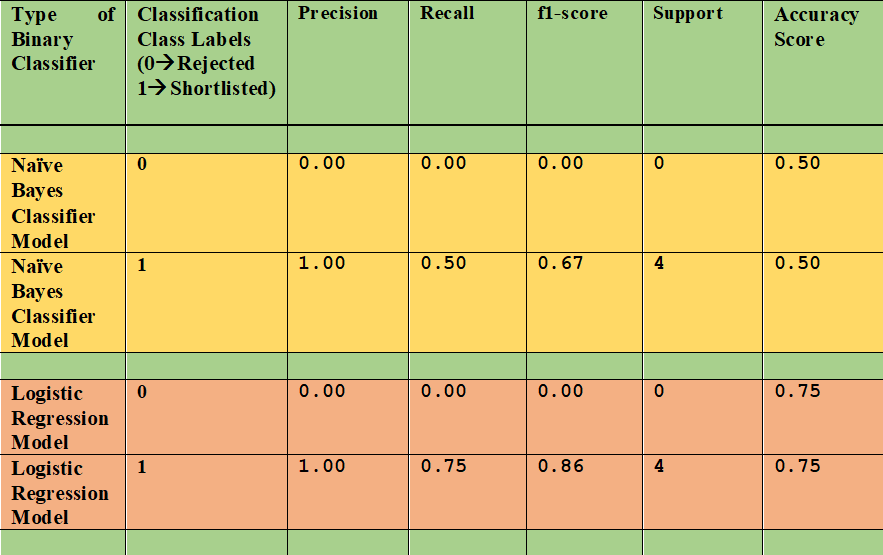

It can be observed from the above Implementation and Analysis that:

Accuracy of the Binary Classifier implemented using Naive Bayes Classifier Model : 0.5

    Accuracy = 0.50 

Accuracy of the Binary Classifier implemented using Logistic Regression Model : 0.75

    Accuracy = 0.75

Therefore, it can be inferred that the Logistic Regression Model has higher Accuracy Score of 0.75 that is it has 
better Accuracy as compared to the Naive Bayes Classifier Model that has Accuracy Score of 0.50 that is of 
lesser Accuracy.

Thus, the Logistic Regression Model implemented for performing Binary Classification on the input customised dataset 
"applicants_acrec" dataset, to determine the total count of the candidates / the number of job applicants

that are Shortlisted and the total count of the candidates / the number of job applicants that are Rejected by an MNC,
for further rounds of selection / Interview, has the Highest Accuracy of 0.75 out of the two Models 

(Naive Bayes Classifier Model and Logistic Regression Model) implemented for performing Binary Classification 
on the input dataset "applicants_acrec" .
